In [75]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [38]:
plt.rcParams["figure.figsize"] = (16,12)
sns.set()

In [45]:
res_df = pd.read_csv('zscores_by_position.csv', index_col=0)

In [46]:
res_df.head()

,Start,End,Start_r,End_r,Mean_Z-Score,Threshold,Sequence_id
0,0,10,0.000000,0.000034,0.0,50,AY394995.1
1,10,20,0.000336,0.000370,0.0,50,AY394995.1
2,20,30,0.000672,0.000706,0.0,50,AY394995.1
3,30,40,0.001008,0.001041,0.0,50,AY394995.1
4,40,50,0.001344,0.001377,0.0,50,AY394995.1


In [49]:
res_df.Threshold.unique()

array([ 50, 150, 300])

In [120]:
sequences_df = pd.read_csv('all_sequences.csv', sep=' ')

In [121]:
sequences_df['Date'] = sequences_df.apply(
    lambda row: dt.date(
        year=int(row['YEAR']),
        month=int(1 if np.isnan(row['MONTH']) else row['MONTH']),
        day=int(1 if np.isnan(row['DAY']) else row['DAY']),
    ),
    axis=1
)

In [122]:
sequences_df.head()

,Virus_name,Species,Sample_location,Accession_no.,YEAR,MONTH,DAY,Length,Date
0,RpShaanxi2011,R_pusillus,Shaanxi,JX993987,2011,9.0,NaN,29484.0,2011-09-01
1,HuB2013,R_sinicus,Hubei,KJ473814,2013,4.0,NaN,29658.0,2013-04-01
2,279_2005,R_macrotis,Hubei,DQ648857,2004,11.0,NaN,29741.0,2004-11-01
3,Rm1,R_macrotis,Hubei,DQ412043,2004,11.0,NaN,29749.0,2004-11-01
4,JL2012,R_ferrumequinum,Jilin,KJ473811,2012,10.0,NaN,29037.0,2012-10-01


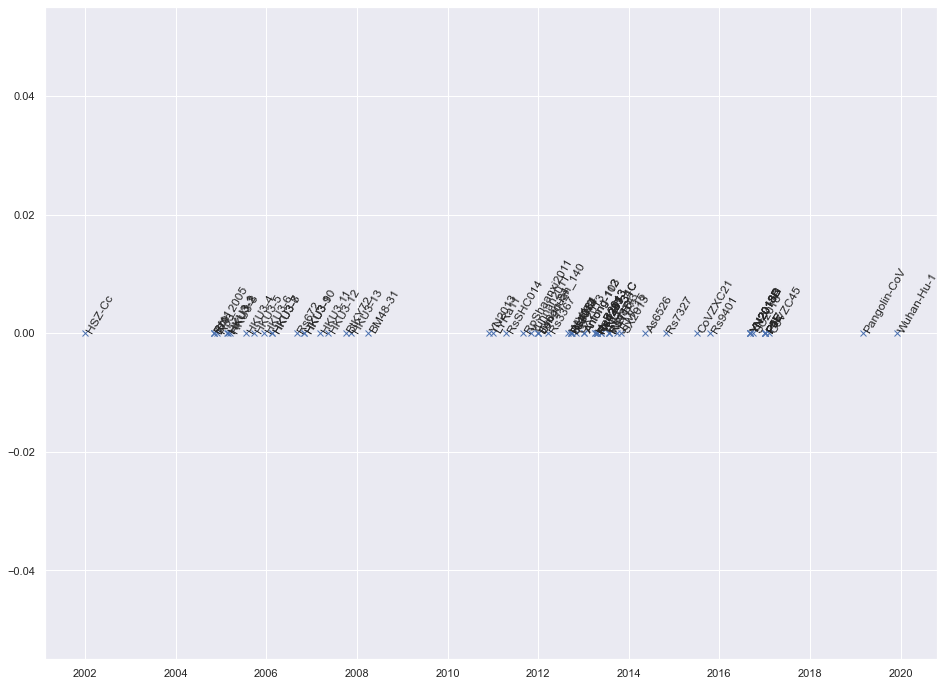

In [39]:
ax = plt.plot(sequences_df.Date, np.zeros(sequences_df.shape[0]), 'x')
for i in range(sequences_df.shape[0]):
    plt.annotate(sequences_df.iloc[i, 0], (sequences_df['Date'].iloc[i], 0), ha='left', rotation=60)
plt.show()

# Visualizations #1

In [53]:
mean_high_zscore_length = res_df[res_df.Threshold==300].groupby('Sequence_id').apply(
    lambda df: 10*df[df['Mean_Z-Score']>0].shape[0]
)

In [62]:
plot_df = sequences_df.copy()
plot_df['h_zscore_length'] = (plot_df['Accession_no.']+ '.1').map(mean_high_zscore_length.to_dict())
plot_df.head()

,Virus_name,Species,Sample_location,Accession_no.,YEAR,MONTH,DAY,Date,h_zscore_length
0,RpShaanxi2011,R_pusillus,Shaanxi,JX993987,2011,9.0,NaN,2011-09-01,470.0
1,HuB2013,R_sinicus,Hubei,KJ473814,2013,4.0,NaN,2013-04-01,380.0
2,279_2005,R_macrotis,Hubei,DQ648857,2004,11.0,NaN,2004-11-01,330.0
3,Rm1,R_macrotis,Hubei,DQ412043,2004,11.0,NaN,2004-11-01,360.0
4,JL2012,R_ferrumequinum,Jilin,KJ473811,2012,10.0,NaN,2012-10-01,300.0


In [100]:
model = LinearRegression()
model = model.fit(
    (plot_df.Date - plot_df.Date.min()).to_numpy().reshape(-1, 1).astype('timedelta64[D]')[
        plot_df.h_zscore_length.notna()
    ],
    plot_df.h_zscore_length[plot_df.h_zscore_length.notna()]
)


In [112]:
x = np.array([0, plot_df.Date.max()-plot_df.Date.min()]).astype('timedelta64[D]').astype(int)

In [114]:
y = model.predict(x.reshape(-1, 1))

In [95]:
(plot_df.Date - plot_df.Date.min()).to_numpy().astype('timedelta64[D]').astype(int)

array([3530, 4108, 1035, 1035, 3926, 4291, 4108, 4322, 3652, 1035, 3957,
       1065, 3913, 4124, 4219, 4219, 5357, 4679, 5036, 3913, 3393, 3730,
       3896, 5357, 4514, 5357, 3913, 4124, 4124, 4124, 1704, 5357, 3256,
       4018, 4018,    0, 4160, 4160, 3652, 5387, 3287, 3591, 3652, 1143,
       1171, 1150, 1296, 1358, 1445, 1761, 1761, 1891, 2144, 1960, 1506,
       1506, 5510, 4929, 6543, 2099, 2282, 4222, 5479, 5479, 5479, 5479,
       5479, 6268])

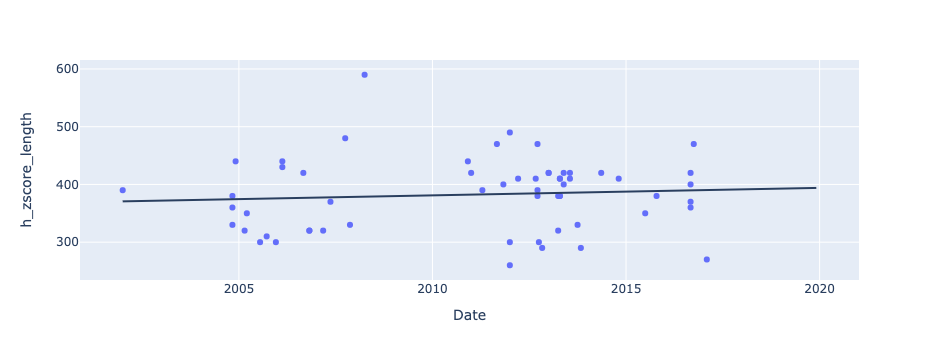

In [123]:
fig = px.scatter(plot_df, x="Date", y="h_zscore_length", hover_data=['Virus_name'], )
fig.add_shape(type="line",
              x0=plot_df.Date.min(), 
              y0=y[0], 
              x1=plot_df.Date.max(), 
              y1=y[1],
             )
# fig.update(layout_xaxis_range=[0,620])
fig.show()

# Attempt #2 

In [133]:
zdna_ranges_df = pd.read_csv('zscores_merged.csv', index_col=0)

In [134]:
zdna_ranges_df.head()

,Chromosome,Start,End,Threshold,Sequence_id
0,chr1,92,110,50,AY394995.1
1,chr1,221,237,50,AY394995.1
2,chr1,279,295,50,AY394995.1
3,chr1,322,338,50,AY394995.1
4,chr1,368,385,50,AY394995.1


[-0.00198652]


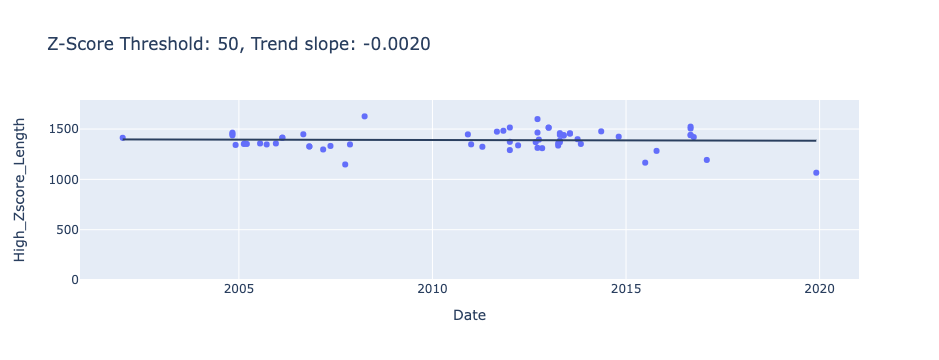

[0.00055818]


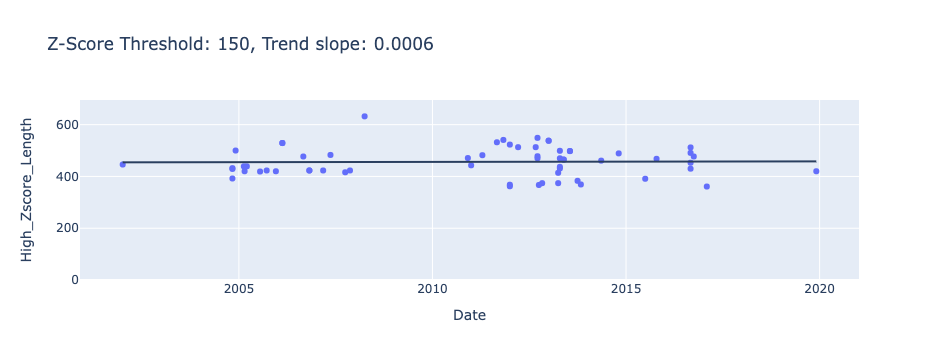

[0.00195635]


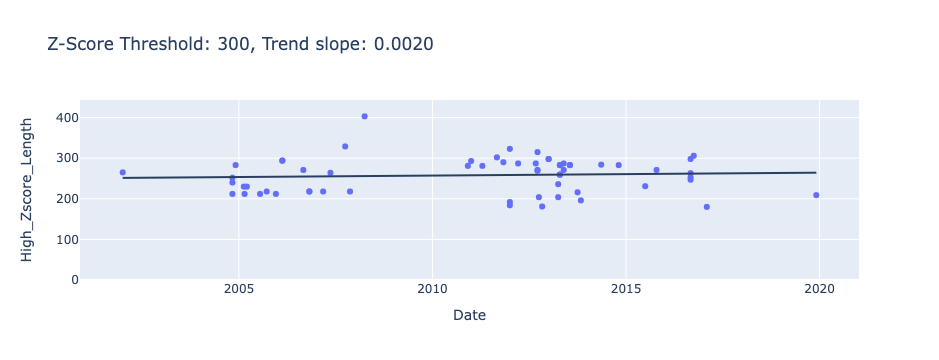

In [164]:
for threshold, group_df in zdna_ranges_df.groupby('Threshold'):
    group_df['Length'] = group_df.End-group_df.Start
    stats_df = group_df.groupby('Sequence_id').agg({'Length': sum})
    stats_df.index = stats_df.index.str[:-2]
    plot_df = sequences_df.copy()
    plot_df['High_Zscore_Length'] = plot_df['Accession_no.'].map(stats_df['Length'].to_dict())

    # Trend line
    model = LinearRegression()
    model = model.fit(
        (plot_df.Date - plot_df.Date.min()).to_numpy().reshape(-1, 1).astype('timedelta64[D]')[
            plot_df.High_Zscore_Length.notna()
        ],
        plot_df.High_Zscore_Length[plot_df.High_Zscore_Length.notna()]
    )
    x = np.array([0, plot_df.Date.max()-plot_df.Date.min()]).astype('timedelta64[D]').astype(int)
    y = model.predict(x.reshape(-1, 1))
    print(model.coef_)
    fig = px.scatter(
        plot_df, x="Date", y="High_Zscore_Length", hover_data=['Virus_name'],
        title=f'Z-Score Threshold: {threshold}, Trend slope: {model.coef_[0]:.4f}'
    )
    
    
    fig.add_shape(type="line",
              x0=plot_df.Date.min(), 
              y0=y[0], 
              x1=plot_df.Date.max(), 
              y1=y[1],
             )
    fig.update_layout(yaxis_range=[0,plot_df['High_Zscore_Length'].max()*1.1])
    fig.show()
